In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [4]:
def create_col_name(base_str, start_int, end_int):
    return [base_str + str(i) for i in range(start_int, end_int+1)]

In [5]:
create_col_name('card', 1, 6)

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [6]:
cat_cols = (['ProductCD'] + create_col_name('card', 1, 6) + ['addr1', 'addr2', 'P_emaildomain',  'R_emaildomain'] 
             + create_col_name('M', 1, 9) + ['DeviceType', 'DeviceInfo'] + create_col_name('id_', 12, 38))

id_cols = ['TransactionID', 'TransactionDT']

target = 'isFraud'

In [7]:
type_map = {c: str for c in cat_cols + id_cols}

In [8]:
df_train_id = pd.read_csv('data/train_identity.csv', dtype=type_map)
df_train_trans = pd.read_csv('data/train_transaction.csv', dtype=type_map)

In [9]:
df_train_id.shape, df_train_trans.shape

((144233, 41), (590540, 394))

In [10]:
df_train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [11]:
df_train = df_train_trans.merge(df_train_id, on='TransactionID', how='left')

In [12]:
numeric_cols = [col for col in df_train.columns.tolist() if col not in cat_cols + id_cols + [target]]

In [13]:
assert(df_train.shape[0]==df_train_trans.shape[0])

In [14]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [15]:
df_train[cat_cols].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


In [16]:
df_train[numeric_cols].head()

,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
0,68.5,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [17]:
df_test_id = pd.read_csv('data/test_identity.csv', dtype=type_map)
df_test_trans = pd.read_csv('data/test_transaction.csv', dtype=type_map)

In [18]:
df_test_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [19]:
df_test_trans.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_test = df_test_trans.merge(df_test_id, on='TransactionID', how='left')

In [61]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [22]:
df_train=reduce_mem_usage(df_train)
df_test=reduce_mem_usage(df_test)

Mem. usage decreased to 715.81 Mb (63.5% reduction)
Mem. usage decreased to 621.42 Mb (63.0% reduction)


In [23]:
# delete the 4 variables in order to reduce the memory issue
del df_test_id
del df_test_trans
del df_train_id
del df_train_trans


In [24]:
def missing_data(df) :
    count = df.isnull().sum()
    percent = (df.isnull().sum()) / (df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    for col in df.columns :
        dtypes = str(df[col].dtype)
        types.append(dtypes)
    total['dtypes'] = types
    
    return np.transpose(total)

In [25]:
missing_data(df_train)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Count,0,0,0,0,0,0,8933,1565,1577,4259,...,450258,512954,517251,512735,449555,449555,449555,449555,449730,471874
Percent,0,0,0,0,0,0,1.51268,0.265012,0.267044,0.721204,...,76.2451,86.8619,87.5895,86.8248,76.1261,76.1261,76.1261,76.1261,76.1557,79.9055
dtypes,object,int8,object,float16,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object


In [27]:
## WE will Drop columns with more 50% Null value.
null_percent = df_train.isnull().sum()/df_train.shape[0]*100

cols_to_drop = np.array(null_percent[null_percent > 50].index)

cols_to_drop

array(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9',
       'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139',
       'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
       'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
       'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163',
       'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171',
       'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179',
       'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187',
       'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
       'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203',
       'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
       'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
       'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227',
       'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
       '

In [28]:
# Drop Columns (cols_to_drop) from train and test
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop,axis=1)

In [30]:
print(df_train.shape)
print(df_test.shape)

(590540, 220)
(506691, 219)


In [31]:
### Fill NaNs

df_train = df_train.fillna(-999)
df_test = df_test.fillna(-999)

# Visualize

# Modeling

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
features = cat_cols + numeric_cols

In [39]:
#X = df_train[features]
#y = df_train[target]

KeyError: "['V165', 'V176', 'V330', 'V256', 'V262', 'V276', 'V187', 'DeviceType', 'V167', 'V151', 'V161', 'D13', 'V145', 'id_09', 'V175', 'V186', 'V182', 'V323', 'id_16', 'id_33', 'V158', 'V205', 'V139', 'V239', 'V199', 'V232', 'V171', 'id_27', 'V142', 'V253', 'V168', 'V138', 'M7', 'V198', 'V267', 'V193', 'V278', 'V259', 'V332', 'V148', 'V156', 'V325', 'V197', 'V200', 'V154', 'id_22', 'V213', 'V226', 'id_13', 'id_25', 'V248', 'D6', 'id_26', 'V331', 'V147', 'V218', 'V272', 'V338', 'V249', 'V260', 'M8', 'V221', 'id_37', 'V169', 'V326', 'id_24', 'V255', 'V164', 'V203', 'V185', 'id_12', 'V207', 'id_02', 'V183', 'V212', 'V258', 'V220', 'R_emaildomain', 'V146', 'V192', 'V277', 'V328', 'V172', 'D8', 'V270', 'V231', 'V153', 'id_07', 'V214', 'V227', 'V184', 'id_08', 'V252', 'V274', 'V237', 'V210', 'D14', 'id_03', 'V263', 'V257', 'id_11', 'V160', 'V159', 'V208', 'V264', 'V141', 'V190', 'id_10', 'V163', 'V166', 'V191', 'V196', 'V140', 'V189', 'V334', 'V170', 'V188', 'V206', 'DeviceInfo', 'V157', 'V224', 'V178', 'id_21', 'V204', 'V268', 'V271', 'id_14', 'V241', 'V177', 'V225', 'V339', 'V337', 'V336', 'V275', 'V149', 'D7', 'V202', 'V242', 'id_38', 'V162', 'V155', 'id_30', 'V201', 'V246', 'id_05', 'V233', 'id_29', 'V327', 'V215', 'id_28', 'V269', 'id_17', 'V244', 'V229', 'V254', 'V333', 'V209', 'id_04', 'V236', 'V273', 'V322', 'V335', 'V251', 'V144', 'V222', 'V243', 'M5', 'V261', 'V179', 'id_36', 'id_01', 'V219', 'id_20', 'dist2', 'V181', 'id_23', 'V217', 'D9', 'V247', 'id_31', 'D12', 'M9', 'id_18', 'V250', 'V230', 'dist1', 'V194', 'id_34', 'V238', 'id_35', 'V173', 'V180', 'V228', 'id_15', 'V223', 'V234', 'V152', 'V150', 'V329', 'V324', 'V216', 'V195', 'id_19', 'V240', 'V174', 'V245', 'V266', 'id_06', 'V235', 'D5', 'id_32', 'V265', 'V211', 'V143'] not in index"

In [40]:
train_y = df_train['isFraud']
train_X = df_train.drop('isFraud', axis=1)

In [43]:
# Label Encoding for categorical variables.
from sklearn import preprocessing

for f in train_X.columns:
    if train_X[f].dtype=='object' or df_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_X[f].values) + list(df_test[f].values))
        train_X[f] = lbl.transform(list(train_X[f].values))
        df_test[f] = lbl.transform(list(df_test[f].values))

In [44]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


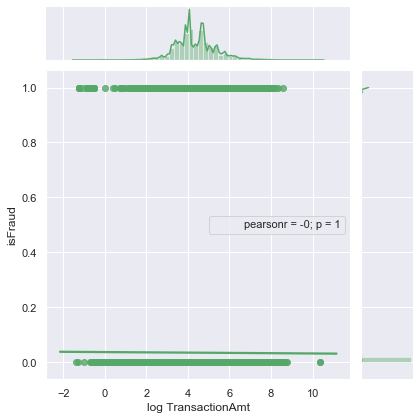

time to plot:  0:02:26.143995


In [50]:
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

sns.set(style="darkgrid")
train_viz= df_train.copy()
fraudarr = np.asarray(train_y)
train_viz['isFraud'] = fraudarr

t0 = datetime.now()
#taking log because of large range of data values.
train_viz['log TransactionAmt'] = np.log(train_viz['TransactionAmt'])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(data=train_viz, x='log TransactionAmt', y='isFraud', color='g', kind='reg')
j.annotate(stats.pearsonr)
plt.show()

print('time to plot:  {}'.format(datetime.now() - t0))

# # Prediction

In [46]:
submission = pd.read_csv('data/sample_submission.csv',index_col='TransactionID')
submission['isFraud'] = logreg.predict_proba(df_test)[:,1]
submission.to_csv('Logreg_submission.csv')
submission.head()

,isFraud
TransactionID,
3663549,0.012202
3663550,0.004083
3663551,0.006572
3663552,0.032426
3663553,0.047745
